In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True) # Mount google drive to load training and testing data


# This where all the Packages are cached instead or reinstalling them every new runtime
PACKAGES_DIR = '/content/drive/My Drive/Bachelor/pip_cache'

# This is where MERGED & PREPROCESSED & CLEANED Dataset is
PREPROCESSED_MERGED_DATASET_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/PREPROCESSED_DATASET/'


# This is where the figures are saved
FIGURES_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/FIGURES/'


  #########################################################################  TensorFlow ##########################################################

# Directory where the pytorch models will be saved 
TF_RECURRENT_MODEL_DIR = '/content/drive/MyDrive/Bachelor/Sentiment/DL_MODELS/recurrent/tf/model/'


# Number of Figures
FIGURE_COUNTS = 1



Mounted at /content/drive


## Packages

In [ ]:
!pip config set global.cache-dir /content/drive/My\ Drive/Bachelor/pip_cache



!pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' lang_trans



# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' wordcloud
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' ar_wordcloud
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' python-bidi
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' arabic-reshaper
# !pip install --cache-dir '/content/drive/My Drive/Bachelor/pip_cache' autokeras


from IPython.display import clear_output
clear_output() # clear output window

In [ ]:
%tensorflow_version 2.x
# Packages 
# types in python
from typing import List, Tuple ,Dict ,Any , Union
import time
import string
import os
import random

# Data Manipulating  & Preprocessing packages
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import unicodedata # normlization of arabic letters encoding to be unicoded 
import pandas as pd
pd.set_option('display.max_colwidth', None) # Setting the display option to show the full width of columns in pandas dataframe.




# Model
import torch
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow import keras


# Metrics
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,roc_curve

 
#import warnings
#warnings.simplefilter(action='ignore')
#warnings.filterwarnings("ignore")

# visualization library
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

# Random Seed
RANDOM_SEED=42
RANDOM_STATE=42



def set_seed(seed=42):
  RANDOM_SEED=seed
  RANDOM_STATE=seed
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic=True
  torch.backends.cudnn.benchmark = False



# Set Matplotlib defaults
plt.style.use('ggplot')
#plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Deep Learning Techniques

#### Constants

In [ ]:
# CONSTANTS

# Batch Size 
BATCH_SIZE = 256

# Buffer Size
BUFFER_SIZE = 10_000


# number of epochs
EPOCHS = 25

# max length of sequences
MAX_LEN = 180

# vocab size
VOCAB_SIZE = 45_000

# Learning Rate of the optimizers
LEARNING_RATE = 5e-5

# Default Epsilon
EPSILON =1e-8


#### Metrics

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

import tensorflow as tf
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import numpy as np
from tensorflow.keras import backend as K

# Define metrics functions
def f1_score(y_true, y_pred, num_classes):
    f1_scores = []
    for i in range(num_classes):
        y_true_i = K.equal(y_true, i)
        y_pred_i = K.equal(K.argmax(y_pred, axis=-1), i)
        precision = tf.keras.metrics.Precision()(y_true_i, y_pred_i)
        recall = tf.keras.metrics.Recall()(y_true_i, y_pred_i)
        f1_scores.append(2 * precision * recall / (precision + recall + K.epsilon()))
    return K.mean(f1_scores)

    
def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_pred - y_true), axis=-1)


def precision(y_true, y_pred):
    return tf.py_function(precision_score, (y_true, y_pred), tf.float32)

def recall(y_true, y_pred):
    return tf.py_function(recall_score, (y_true, y_pred), tf.float32)

def accuracy(y_true, y_pred):
    return tf.py_function(accuracy_score, (y_true, y_pred), tf.float32)



def compute_metrics(y_true: np.ndarray, y_pred:np.ndarray ) -> Dict[str, Any]:
  """  called each time the model is evaluated on the validation dataset
        @returns a dictionary of metrics such as accuracy(glu) , acc_score , F1 score, precision,recall,roc_score and auc_score."""
  predictions = np.argmax(y_pred, axis=-1)
  # f1-score
  f1_macro = f1_score(y_true, predictions, average='macro')
  f1_weighted = f1_score(y_true, predictions, average='weighted')
  # precision
  precision_macro = precision_score(y_true, predictions, average='macro')
  precision_weighted = precision_score(y_true, predictions, average='weighted')
  # recall
  recall_macro = recall_score(y_true, predictions, average='macro')
  recall_weighted = recall_score(y_true, predictions, average='weighted')

  acc_score=accuracy_score(y_true,predictions)
  
  metrics = {
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
        "precision_macro": precision_macro,
        "precision_weighted": precision_weighted,
        "recall_macro": recall_macro,
        "recall_weighted": recall_weighted,
        'accuracy_score':acc_score
        }
  

  return metrics




#### Clear Previous Sessions

In [ ]:
from keras.backend import clear_session # clears the current Keras session and frees up memory.
import gc
clear_session()

# set the maximum split size to 512 MB
max_split_size_mb = 512


# Clear PyTorch cache (if using a GPU)
if torch.cuda.is_available():
    torch.cuda.empty_cache()
gc.collect()

# Delete existing PyTorch models or variables

model = 'dummy'
optimizer= 'dummy'
tokenizer='dummy'
trainer='dummy'
del model, optimizer,tokenizer,trainer

# set the environment variable
#os.environ['PYTORCH_CUDA_ALLOC_CONF'] = f'max_split_size={max_split_size_mb}'


In [ ]:
#  check if your system has a compatible NVIDIA G
print(torch.cuda.is_available())

False


### Loss Functions

> `SparseCategoricalCrossentropy` : is a loss function in Keras that is used for multi-class classification problems where the target labels are integers (sparse categorical labels) instead of one-hot encoded vectors. In other words, it is similar to CategoricalCrossentropy, but it can handle integer-encoded labels directly, without requiring them to be one-hot encoded.

> `BinaryCrossentropy`: This loss function is used when the labels are binary (i.e., 0 or 1). It calculates the cross-entropy loss between the true labels and the predicted probabilities.

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy,BinaryCrossentropy

MULTICLASS_LOSS=SparseCategoricalCrossentropy(
                                      from_logits=True,  # Interpret the model's outputs as unnormalized logits.
                                      reduction=tf.keras.losses.Reduction.AUTO,  # Compute the mean loss over all samples.
                                      name='sparse_categorical_crossentropy'
                                      )
BINARY_LOSS=BinaryCrossentropy(from_logits=True)

### Optimizers

>  `Adam`: optimizer is a popular optimization algorithm used for training deep neural networks. It is an adaptive learning rate optimization algorithm


> `Adagrad`: Adaptive Gradient optimizer is an adaptive learning rate optimization algorithm that modifies the learning rate of each weight based on the historical gradients of that weight.

> `RMSprop`: Root Mean Square Propagation optimizer is another adaptive learning rate optimization algorithm that modifies the learning rate of each weight based on the historical gradients of that weight, but with a different update rule than Adagrad.

> `Adadelta`: Adaptive Delta optimizer is another adaptive learning rate optimization algorithm that can automatically adapt the learning rate of each weight based on the gradients and update rules of the previous iterations.

In [ ]:
from tensorflow.keras.optimizers import Adamax, SGD, RMSprop
from tensorflow.keras.optimizers.schedules import ExponentialDecay

#NUM_TRAIN_STEPS=len(tf_train_dataset)*EPOCHS
# i went and read it

INTIAL_LEARNING_RATE = 5e-5



# # Create an SGDoptimizer with a custom learning rate
# SGD_OPTIMIZER = SGD(learning_rate=lr_schedule)
# RMSprop_OPTIMIZER = RMSprop(learning_rate=lr_schedule)

### Callbacks


> `Checkpoints` : Now we are going to setup and configure our model to save checkpoinst as it trains. This will allow us to load our model from a checkpoint and continue training it.

In [ ]:
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
import datetime


# Define the EarlyStopping callback
EARLYSTOP_CALLBACK = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,restore_best_weights=True)


# Name of the checkpoint files
checkpoint_prefix = os.path.join(TF_RECURRENT_MODEL_DIR, "ckpt_{epoch}")



# define the ModelCheckpoint callback
SAVE_CHECKPOINT_CALLBACK = ModelCheckpoint(
                            filepath=checkpoint_prefix, 
                             monitor='val_loss', 
                            save_weights_only=False,
                             save_best_only=False, 
                             mode='auto', 
                            options=None,
                            verbose=2,
                            save_freq='epoch',
                                      )


# Create a TensorBoard callback
log_dir = TF_RECURRENT_MODEL_DIR+"logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
TENSORBOARD_CALLBACK = TensorBoard(log_dir=log_dir, histogram_freq=1)



TF_CALLBACKS = [EARLYSTOP_CALLBACK]




### Metrics for model.compile()

In [ ]:
from keras.metrics import BinaryAccuracy,Precision,Recall,AUC,SparseCategoricalAccuracy
METRICS = [
      SparseCategoricalAccuracy(name='accuracy'),
      # tf.keras.metrics.Precision(name='precision'), 
      # tf.keras.metrics.Recall(name='recall'),
      

      ]

### Visualization

> `Accuracy`

> `Loss`

> `roc_curve`

In [ ]:
def plot_accuracy(model):
  """
  plots the model accuracy across Epochs on Training & Validation Dataset
  """
  plt.plot(model.history['accuracy'],label='accuracy')
  plt.plot(model.history['val_accuracy'],label='val_accuracy')
  plt.legend()
  plt.show()

def plot_history(history):
  """ 
  plots the model accuracy and loss across Epochs on Training & Validation Dataset
  """
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
    
  epochs = range(1,len(accuracy) + 1)
    
  # Plot accuracy  
  plt.figure(1)
  plt.plot(epochs, accuracy, 'b', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
    
  # Plot loss
  plt.figure(2)
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_roc(y_test, y_pred, model_name):
  """
  Plots the ROC curve for the model's predictions on the test dataset
  """
  fpr, tpr, thr = roc_curve(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(8, 8))
  ax.plot(fpr, tpr, 'k-')
  ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
  ax.grid(True)
  ax.set(title='ROC Curve for {} on diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
  

In [ ]:
import tensorflow as tf

# Clear the TensorFlow session
tf.keras.backend.clear_session()

# Reset TensorFlow variables to their default values
tf.compat.v1.reset_default_graph()

# Clear GPU memory (if using a GPU)
tf.compat.v1.keras.backend.clear_session()

### My Preprocessed Labeled Dataset
> Consists of Egyptian and Modern Standard Arabic (MSA) .

> 
```
{'LABEL': Value(dtype='int64', id=None),
 'TWEET': Value(dtype='string', id=None)}
```
> Label explaination :

```
SENTIMENT_TO_ID = {
   "positive": 0 ,
   "negative": 1,
   "neutral": 2,
}

ID_TO_SENTIMENT = {
   0:"positive" ,
   1:"negative" ,
   2:"neutral",
   } 
```

In [ ]:
SENTIMENT_TO_ID = {
   "positive": 0 ,
   "negative": 1,
   "neutral": 2,
}

ID_TO_SENTIMENT = {
   0:"positive" ,
   1:"negative" ,
   2:"neutral",
}

In [ ]:
# Dataset names 
TRAIN_DATASET_NAME='TRAIN_DATASET'
VALIDDATION_DATASET_NAME='VALIDATION_DATASET'
TEST_DATASET_NAME='TEST_DATASET'
DATASET_NAME = 'DATASET'

stemmed_data_files = {
              "train": f"{os.path.join(PREPROCESSED_MERGED_DATASET_DIR , TRAIN_DATASET_NAME + '.csv')}",
              "validation":f"{os.path.join(PREPROCESSED_MERGED_DATASET_DIR, VALIDDATION_DATASET_NAME + '.csv' )}",
              "test": f"{os.path.join(PREPROCESSED_MERGED_DATASET_DIR ,TEST_DATASET_NAME + '.csv')}",
              #"dataset": f"{PREPROCESSED_MERGED_DATASET_DIR +DATASET_NAME}.csv",
              }

unstemmed_data_files = {
              "train": f"{os.path.join(PREPROCESSED_MERGED_DATASET_DIR , 'unstemmed/'+TRAIN_DATASET_NAME + '.csv')}",
              'validation':f"{os.path.join(PREPROCESSED_MERGED_DATASET_DIR, 'unstemmed/'+VALIDDATION_DATASET_NAME + '.csv' )}",
              #"dataset": f"{PREPROCESSED_MERGED_DATASET_DIR +DATASET_NAME}.csv",
              }

In [ ]:
from lang_trans.arabic import buckwalter
print(buckwalter.untransliterate('h*A AlbrnAmj yETynA nTq AlHrwf'))
# Convert all text to lowercase to treat "word" and "Word" as the same

print(buckwalter.transliterate('بس يا تعالى نروح البنك'))

هذا البرنامج يعطينا نطق الحروف
bs yA tEAlY nrwH Albnk


In [ ]:
import tensorflow as tf
import pandas as pd

from lang_trans.arabic import buckwalter

def load_dataset(dataset_path: str) -> tf.data.Dataset:
    global VOCAB_SIZE , MAX_LEN

    # Load the CSV file using pandas
    data = pd.read_csv(dataset_path)

    # Remove repeated words
    data["TWEET"] = data["TWEET"].str.replace(r'\b(\w+)(?:\W+\1\b)+', r'\1')
    
    # Limit to 180 words
    dataframe = data[data['TWEET'].apply(lambda x: len(x.split())) <= MAX_LEN]



    # Extract the features and labels as numpy arrays
    features = dataframe['TWEET'].values
    labels = dataframe['LABEL'].values



    # Create a set to store all unique words
    unique_words = set()
    transileterated_unique_words = set()

    transliterated_features = []
    # Loop through each text in the dataset
    for text in features:
        # Split the text into words using whitespace as the delimiter
        words = text.split()
        # Add each word to the set of unique words
        unique_words.update(words)

      # Preprocess text for Arabic language to Franko characters
        text = buckwalter.transliterate(text)
      # Lower case the Franko characters
        text = text.lower()
        transliterated_features.append(text)


        # Split the text into words using whitespace as the delimiter
        words = text.split()
        MAX_LEN = max(MAX_LEN,len(words))

        transileterated_unique_words.update(words)

    # Print the total number of unique words
    VOCAB_SIZE =  max(VOCAB_SIZE,len(transileterated_unique_words))
    print("Total number of unique words before transliterate:", len(unique_words))
    print("Total number of unique words after transliterate:", VOCAB_SIZE)
    print("Max length:", MAX_LEN)


    # # Tokenize text and pad sequences
    # tokenizer = Tokenizer(num_words = VOCAB_SIZE, oov_token = "<OOV>")
    # tokenizer.fit_on_texts(transliterated_features)
    # features = tokenizer.texts_to_sequences(transliterated_features)
    # features = pad_sequences(features, padding='post', truncating='post', maxlen=MAX_LEN)

    # Create a TensorFlow dataset from the features and labels
    dataset = tf.data.Dataset.from_tensor_slices((transliterated_features, labels))
    dataset = dataset.shuffle(buffer_size=len(transliterated_features)).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

    return dataset


In [ ]:
train_dataset , validation_dataset = load_dataset(stemmed_data_files['train']),load_dataset(stemmed_data_files['validation'])

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

In [ ]:
# Create a text encoder
VOCAB_SIZE = VOCAB_SIZE + 1 + 1 # to account for <OOV> and padding tokens
encoder_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens = VOCAB_SIZE, # will compute the 1000 most frequent tokens occurring in the input dataset, anything else will be considered "unknown" his vocabulary contains 1 OOV token, so the effective number of tokens is `(max_tokens - 1 - (1 if output_mode == "int" else 0))`
    output_mode='int',
    split='whitespace',
    output_sequence_length = MAX_LEN, # the output will have its time dimension padded or truncated to exactly output_sequence_length` values
    encoding = 'utf-8',
    input_shape=(MAX_LEN,),
    name='text_vectorization_layer'   # Give the layer a descriptive name
    )

In [ ]:
encoder_layer.adapt(train_dataset.map(lambda text, label: text)) 

In [ ]:
vocab = np.array(encoder_layer.get_vocabulary())
vocab[:20]

In [ ]:
encoded_example = encoder_layer(example)[:2].numpy()
print(encoded_example)
for n in range(2):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

### RNN MODEL

#### Configuring the Model

In [ ]:
EMBEDDING_DIM = 64
NUM_CLASSES = len(SENTIMENT_TO_ID)

# The None indicates that the size of this dimension is not fixed, and will be determined at runtime based on the size of the input data.
input_layer = tf.keras.layers.Input(shape=(1,), dtype=tf.string , name = 'input_layer')


# Create an embedding layer to convert integer-encoded vocabulary to dense vectors
embedding_layer = tf.keras.layers.Embedding(
    input_dim=encoder_layer.vocabulary_size(),  # size of the vocabulary
    output_dim=EMBEDDING_DIM,  # dimension of the dense embedding
    mask_zero=True,  # mask padding values in the input sequence
    name='embedding_layer'  
)


# Define the bidirectional LSTM layer with 256 units
lstm_layer = tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(units=256, name='lstm',recurrent_dropout = 0.15 ,# randomly dropping out some of the recurrent connections during training
                         dropout=0.1 # During training, a certain fraction of the input neurons is randomly selected and set to zero
                         ),
    name='bidirectional_lstm',
)

# Add layer normalization layer after LSTM
layer_norm_layer = tf.keras.layers.LayerNormalization(
    axis=-1,  # Specify the normalization axis. Default is -1 (last axis).
    epsilon=1e-6,  # Add a small number to the variance to avoid dividing by zero.
    center=True,  # Add a trainable bias vector.
    scale=True,  # Add a trainable scaling factor.
    beta_initializer='zeros',  # Initialize the bias vector with zeros.
    gamma_initializer='ones',  # Initialize the scaling factor with ones.
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    trainable=True,
    name='layer_normalization_layer')

# Add dropout layer after batch normalization
dropout_layer = tf.keras.layers.Dropout(0.1, name='dropout_layer')


# Define the dense layer with ReLU activation
dense_layer = tf.keras.layers.Dense(
    units=64,   # Number of units in the layer
    activation='relu',  # Activation function used
    kernel_regularizer=tf.keras.regularizers.l2(0.01), # Apply L2 regularization (NEW)
    name='dense_layer' 
)

# Add batch normalization layer after dense layer
batch_norm_layer = tf.keras.layers.BatchNormalization(name='batch_normalization_layer')

# Add dropout layer after batch normalization
dropout_layer_2 = tf.keras.layers.Dropout(0.2, name='dropout_layer_2')

# Define the output layer with softmax activation for 3 classes
output_layer = tf.keras.layers.Dense(
    units= NUM_CLASSES, # use 'units' instead of specifying the number directly
    activation= None,
    name= 'output_layer' 
)
# Define the Sequential model with all the layers
model = tf.keras.Sequential([
    input_layer,
    encoder_layer,
    embedding_layer,
    lstm_layer,
    layer_norm_layer,  # Add layer normalization layer after LSTM
    dropout_layer,  # Add dropout layer after batch normalization
    dense_layer,
    batch_norm_layer,  # Add batch normalization layer after dense layer
    dropout_layer_2,  # Add dropout layer after batch normalization
    output_layer
])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True, True, True, True, True]


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_layer (T  (None, 180)              0         
 extVectorization)                                               
                                                                 
 embedding_layer (Embedding)  (None, 180, 64)          2502656   
                                                                 
 bidirectional_lstm (Bidirec  (None, 512)              657408    
 tional)                                                         
                                                                 
 layer_normalization_layer (  (None, 512)              1024      
 LayerNormalization)                                             
                                                                 
 dropout_layer (Dropout)     (None, 512)               0         
                                                        

In [ ]:

# Check if GPU is available and set it as the default device
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")


# Check if the model is using GPU
print(tf.config.list_physical_devices('GPU'))

GPU found
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
TF_lATEST_EPOCH = 0

checkpoint_path = os.path.join(TF_RECURRENT_MODEL_DIR, f"ckpt_{TF_lATEST_EPOCH}")

if not os.path.exists(TF_RECURRENT_MODEL_DIR):
    os.makedirs(TF_RECURRENT_MODEL_DIR)
    print("Directory created successfully at", TF_RECURRENT_MODEL_DIR)

if os.path.exists(checkpoint_path):
    print('Checkpoint file exists:', checkpoint_path)
    model.load_weights(checkpoint_path)
else:
    print('Checkpoint file does not exist:', checkpoint_path)


Checkpoint file does not exist: /content/drive/MyDrive/Bachelor/Sentiment/DL_MODELS/recurrent/tf/model/ckpt_0


In [ ]:
#Load the latest checkpoint
# latest_checkpoint = tf.train.latest_checkpoint(TF_RECURRENT_MODEL_DIR)
# print(latest_checkpoint)
# model.load_weights(latest_checkpoint)


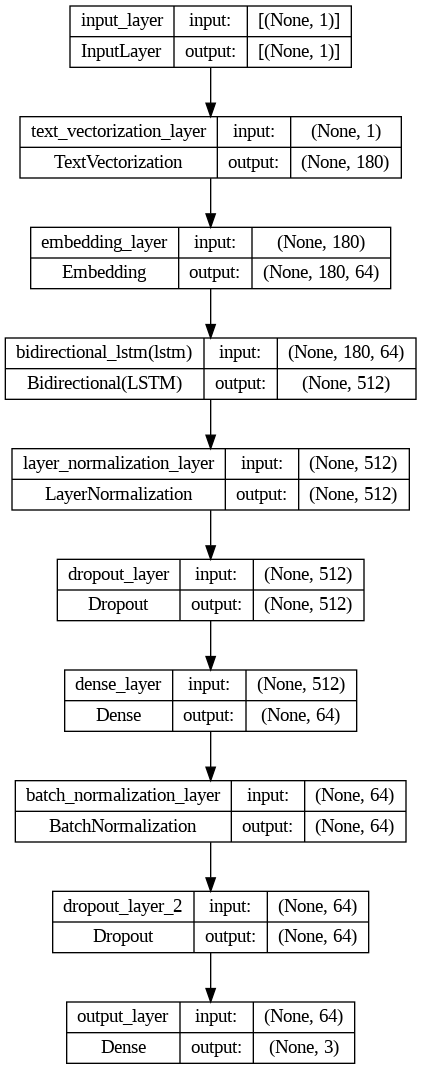

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file=f'{TF_RECURRENT_MODEL_DIR}model.png', show_shapes = True)

In [ ]:
# compile the model

# number of batches to be processed in one epoch 
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()

# total number of steps the model will be trained for
NUM_TRAIN_STEPS = BATCH_SIZE * steps_per_epoch * EPOCHS

lr_schedule = ExponentialDecay(
    INTIAL_LEARNING_RATE, decay_steps=NUM_TRAIN_STEPS, decay_rate=0.96, staircase=True
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)



trainable_variables = model.trainable_variables
optimizer.build(trainable_variables)

model.compile(optimizer = optimizer,
                loss = MULTICLASS_LOSS,
                metrics = METRICS #['accuracy']
                )

In [ ]:
import multiprocessing
gpu_name = tf.test.gpu_device_name()

num_workers = multiprocessing.cpu_count()
validation_steps = tf.data.experimental.cardinality(validation_dataset).numpy()
# Get the value of max_queue_size
max_queue_size = 10
print("Max Queue Size:", max_queue_size)
print(f"gpu_name: {gpu_name} Number of available CPUs: {num_workers} , steps_per_epoch : {steps_per_epoch} \n , validation_steps : {validation_steps} , Batch Size : {BATCH_SIZE}")

Max Queue Size: 10
gpu_name: /device:GPU:0 Number of available CPUs: 2 , steps_per_epoch : 200  , validation_steps : 25 , Batch Size : 256


In [ ]:
with tf.device(gpu_name):

  history = model.fit(
      train_dataset,           # Input training dataset
      validation_data = validation_dataset,    # Validation dataset
      epochs = EPOCHS,         # Number of training epochs
      callbacks = TF_CALLBACKS,  # List of callbacks for training
      verbose=1,                # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
      steps_per_epoch = steps_per_epoch,  # Number of steps per epoch for training dataset
      validation_steps = validation_steps,  # Number of steps per epoch for validation dataset
      validation_batch_size = BATCH_SIZE,  # Batch size for validation dataset
      shuffle = True,             # Shuffle the data each epoch
      use_multiprocessing = True, # Use multiple CPUs for processing the data
      workers = num_workers,      # Number of worker threads for preprocessing data
      max_queue_size = max_queue_size,    # Maximum size of the queue for storing preprocessed data
  )

Epoch 1/25
200/200 [==============================] - 433s 2s/step - loss: 2.3011 - accuracy: 0.4743 - val_loss: 2.1942 - val_accuracy: 0.5246
Epoch 2/25
200/200 [==============================] - 398s 2s/step - loss: 1.9941 - accuracy: 0.5745 - val_loss: 1.8914 - val_accuracy: 0.6117
Epoch 3/25
200/200 [==============================] - 392s 2s/step - loss: 1.8244 - accuracy: 0.6299 - val_loss: 1.7457 - val_accuracy: 0.6490
Epoch 4/25
200/200 [==============================] - 384s 2s/step - loss: 1.6875 - accuracy: 0.6677 - val_loss: 1.6393 - val_accuracy: 0.6769
Epoch 5/25
200/200 [==============================] - 382s 2s/step - loss: 1.5642 - accuracy: 0.6992 - val_loss: 1.5516 - val_accuracy: 0.6986
Epoch 6/25
200/200 [==============================] - 380s 2s/step - loss: 1.4532 - accuracy: 0.7249 - val_loss: 1.4866 - val_accuracy: 0.7069
Epoch 7/25
200/200 [==============================] - 376s 2s/step - loss: 1.3458 - accuracy: 0.7505 - val_loss: 1.4139 - val_accuracy: 0.7172

KeyboardInterrupt: ignored

In [ ]:
# Save the model
tf.saved_model.save(model, TF_RECURRENT_MODEL_DIR)

# Load the saved model
loaded_model = tf.saved_model.load(TF_RECURRENT_MODEL_DIR)

In [ ]:
embedding_weights = model.get_layer('embedding_layer').get_weights()[0]
np.save(TF_RECURRENT_MODEL_DIR+'embedding_weights.npy', embedding_weights)

In [ ]:
!tensorboard --logdir logs/fit

In [ ]:
%%time
loss, accuracy = model.evaluate(validation_dataset, verbose=2)

In [ ]:
preds = model.predict(validation_dataset)["logits"]
class_preds = np.argmax(preds, axis=1)

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=class_preds, references=validation_dataset["validation"]["LABEL"])

In [ ]:
save_path = os.path.join(TF_RECURRENT_MODEL_DIR, f"_{TF_lATEST_EPOCH}")

##### Configuring the Model

In [ ]:
TF_lATEST_EPOCH=0

checkpoint_path = os.path.join(TF_CHECKPOINT_DIR, f"ckpt_{TF_lATEST_EPOCH}")

if not os.path.exists(TF_CHECKPOINT_DIR):
    os.makedirs(TF_CHECKPOINT_DIR)
    print("Directory created successfully at", TF_CHECKPOINT_DIR)

if os.path.exists(checkpoint_path):
    print('Checkpoint file exists:', checkpoint_path)
    model.load_weights(checkpoint_path)
else:
    print('Checkpoint file does not exist:', checkpoint_path)


In [ ]:
%%time
# Train your model with GPU support
with tf.device('/GPU:0'):
  model.fit(
      tf_train_dataset,
      validation_data=tf_validation_dataset,
      epochs=EPOCHS,
      callbacks=CALLBACKS,
      verbose=2,
      initial_epoch=TF_lATEST_EPOCH
  )

In [ ]:
loss, accuracy = model.evaluate(tf_test_dataset, verbose=2)

In [ ]:
preds = model.predict(tf_validation_dataset)["logits"]
class_preds = np.argmax(preds, axis=1)

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=class_preds, references=tf_test_dataset["validation"]["label"])

In [ ]:
save_path = os.path.join(TF_MODEL_DIR, f"_{checkpoint}")

# saving the model
model.save_pretrained(save_path)

##### Configuring the Model

In [ ]:
loss, accuracy = model.evaluate(tf_test_dataset, verbose=2)

In [ ]:
import tensorflow as tf 
predictions=tf.math.softmax(outputs.logits,axis=-1)
print(predictions)

### CNN with (GRU)RNN MODEL

#### Configuring the Model

In [ ]:
from tensorflow.keras.layers import (
                                    Input,
                                     Masking,
                                     Embedding,
                                     Conv1D,
                                     MaxPooling1D ,
                                     BatchNormalization,
                                     Bidirectional,
                                     LayerNormalization,
                                     GRU,
                                     Dense,
                                     Dropout
                                     )


EMBEDDING_DIM = 64
NUM_CLASSES = len(SENTIMENT_TO_ID)

# The None indicates that the size of this dimension is not fyeixed, and will be determined at runtime based on the size of the input data.
input_layer = Input(shape=(1,), dtype=tf.string , name = 'input_layer')

# Add a Masking layer to preserve masking information
masking_layer = Masking(mask_value=0, name='masking_layer')

# Create an embedding layer to convert integer-encoded vocabulary to dense vectors
embedding_layer = Embedding(
    input_dim=encoder_layer.vocabulary_size(),  # size of the vocabulary
    output_dim=EMBEDDING_DIM,  # dimension of the dense embedding
    mask_zero=True,  # mask padding values in the input sequence
    name='embedding_layer'  
)

# Define the convolutional layer
conv_layer = Conv1D(filters=64, kernel_size=3, activation='relu', name='conv_layer')




# Define the max pooling layer
max_pool_layer = MaxPooling1D(pool_size=2, name='max_pool_layer')

batch_norm_layer = BatchNormalization(name='batch_normalization_layer')


# Define the bidirectional GRU layer with 256 units
gru_layer = tf.keras.layers.Bidirectional(
    tf.keras.layers.GRU(units=256, name='gru',recurrent_dropout = 0.15 ,# randomly dropping out some of the recurrent connections during training
                         dropout=0.1 # During training, a certain fraction of the input neurons is randomly selected and set to zero
                         ),
    name='bidirectional_gru',
)

# Add layer normalization layer after LSTM
layer_norm_layer = tf.keras.layers.LayerNormalization(
    axis=-1,  # Specify the normalization axis. Default is -1 (last axis).
    epsilon=1e-6,  # Add a small number to the variance to avoid dividing by zero.
    center=True,  # Add a trainable bias vector.
    scale=True,  # Add a trainable scaling factor.
    beta_initializer='zeros',  # Initialize the bias vector with zeros.
    gamma_initializer='ones',  # Initialize the scaling factor with ones.
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    trainable=True,
    name='layer_normalization_layer')

# Add dropout layer after batch normalization
dropout_layer = tf.keras.layers.Dropout(0.25, name='dropout_layer')


# Define the dense layer with ReLU activation
dense_layer = tf.keras.layers.Dense(
    units=64,   # Number of units in the layer
    activation='relu',  # Activation function used
    kernel_regularizer=tf.keras.regularizers.l2(0.01), # Apply L2 regularization (NEW)
    name='dense_layer' 
)

# Add batch normalization layer after dense layer
batch_norm_layer_2 = tf.keras.layers.BatchNormalization(name='batch_normalization_layer_2')

# Add dropout layer after batch normalization
dropout_layer_2 = tf.keras.layers.Dropout(0.3, name='dropout_layer_2')

# Define the output layer with softmax activation for 3 classes
output_layer = tf.keras.layers.Dense(
    units= NUM_CLASSES, # use 'units' instead of specifying the number directly
    activation= None,
    name= 'output_layer' 
)
# Define the Sequential model with all the layers
model = tf.keras.Sequential([
    input_layer,
    encoder_layer,
    masking_layer,
    embedding_layer,
    conv_layer,
    max_pool_layer,
    batch_norm_layer,
    gru_layer,
    layer_norm_layer,  # Add layer normalization layer after LSTM
    dropout_layer,  # Add dropout layer after batch normalization
    dense_layer,
    batch_norm_layer_2,  # Add batch normalization layer after dense layer
    dropout_layer_2,  # Add dropout layer after batch normalization
    output_layer
])

In [ ]:
embedding_weights = np.load(TF_RECURRENT_MODEL_DIR+'embedding_weights.npy')
model.get_layer('embedding_layer').set_weights([embedding_weights])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, False, False, True, True, True, True, True, True, True, True]


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_layer (T  (None, 180)              0         
 extVectorization)                                               
                                                                 
 masking_layer (Masking)     (None, 180)               0         
                                                                 
 embedding_layer (Embedding)  (None, 180, 64)          2502656   
                                                                 
 conv_layer (Conv1D)         (None, 178, 64)           12352     
                                                                 
 max_pool_layer (MaxPooling1  (None, 89, 64)           0         
 D)                                                              
                                                                 
 batch_normalization_layer (  (None, 89, 64)          

In [ ]:
# Check if GPU is available and set it as the default device
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")


# Check if the model is using GPU
print(tf.config.list_physical_devices('GPU'))

GPU found
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
TF_lATEST_EPOCH = 0

checkpoint_path = os.path.join(TF_RECURRENT_MODEL_DIR, f"ckpt_{TF_lATEST_EPOCH}")

if not os.path.exists(TF_RECURRENT_MODEL_DIR):
    os.makedirs(TF_RECURRENT_MODEL_DIR)
    print("Directory created successfully at", TF_RECURRENT_MODEL_DIR)

if os.path.exists(checkpoint_path):
    print('Checkpoint file exists:', checkpoint_path)
    model.load_weights(checkpoint_path)
else:
    print('Checkpoint file does not exist:', checkpoint_path)


Checkpoint file does not exist: /content/drive/MyDrive/Bachelor/Sentiment/DL_MODELS/recurrent/tf/model/ckpt_0


In [ ]:
#Load the latest checkpoint
# latest_checkpoint = tf.train.latest_checkpoint(TF_RECURRENT_MODEL_DIR)
# print(latest_checkpoint)
# model.load_weights(latest_checkpoint)


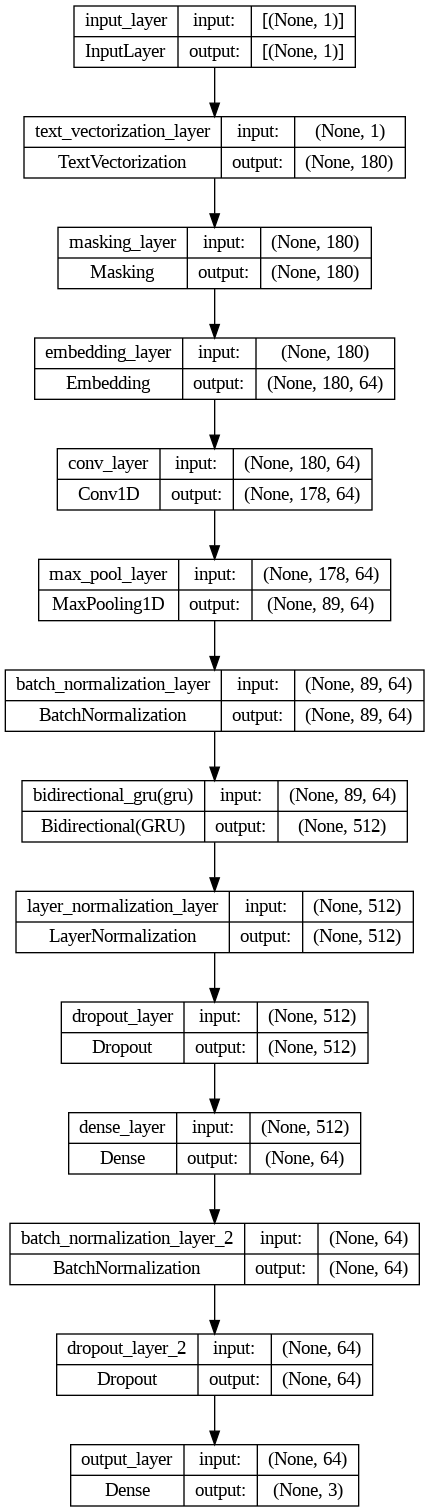

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file=f'{TF_RECURRENT_MODEL_DIR}model.png', show_shapes = True)

In [ ]:
# compile the model

# number of batches to be processed in one epoch 
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()

# total number of steps the model will be trained for
NUM_TRAIN_STEPS = BATCH_SIZE * steps_per_epoch * EPOCHS

lr_schedule = ExponentialDecay(
    INTIAL_LEARNING_RATE, decay_steps=NUM_TRAIN_STEPS, decay_rate=0.96, staircase=True
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)



trainable_variables = model.trainable_variables
optimizer.build(trainable_variables)

model.compile(optimizer = optimizer,
                loss = MULTICLASS_LOSS,
                metrics = METRICS #['accuracy']
                )

In [ ]:
import multiprocessing
gpu_name = tf.test.gpu_device_name()

num_workers = multiprocessing.cpu_count()
validation_steps = tf.data.experimental.cardinality(validation_dataset).numpy()
# Get the value of max_queue_size
max_queue_size = 10
print("Max Queue Size:", max_queue_size)
print(f"gpu_name: {gpu_name} Number of available CPUs: {num_workers} , steps_per_epoch : {steps_per_epoch} \n , validation_steps : {validation_steps} , Batch Size : {BATCH_SIZE}")

Max Queue Size: 10
gpu_name: /device:GPU:0 Number of available CPUs: 2 , steps_per_epoch : 200 
 , validation_steps : 25 , Batch Size : 256


In [ ]:
with tf.device(gpu_name):

  history = model.fit(
      train_dataset,           # Input training dataset
      validation_data = validation_dataset,    # Validation dataset
      epochs = EPOCHS,         # Number of training epochs
      callbacks = TF_CALLBACKS,  # List of callbacks for training
      verbose=1,                # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
      steps_per_epoch = steps_per_epoch,  # Number of steps per epoch for training dataset
      validation_steps = validation_steps,  # Number of steps per epoch for validation dataset
      validation_batch_size = BATCH_SIZE,  # Batch size for validation dataset
      shuffle = True,             # Shuffle the data each epoch
      use_multiprocessing = True, # Use multiple CPUs for processing the data
      workers = num_workers,      # Number of worker threads for preprocessing data
      max_queue_size = max_queue_size,    # Maximum size of the queue for storing preprocessed data
  )

Epoch 1/25
200/200 [==============================] - 182s 883ms/step - loss: 2.2759 - accuracy: 0.5278 - val_loss: 2.2653 - val_accuracy: 0.5745
Epoch 2/25
200/200 [==============================] - 164s 817ms/step - loss: 1.7443 - accuracy: 0.6863 - val_loss: 1.8118 - val_accuracy: 0.6768
Epoch 3/25
200/200 [==============================] - 159s 798ms/step - loss: 1.4609 - accuracy: 0.7669 - val_loss: 1.6447 - val_accuracy: 0.7039
Epoch 4/25
200/200 [==============================] - 157s 788ms/step - loss: 1.2610 - accuracy: 0.8105 - val_loss: 1.5828 - val_accuracy: 0.7075
Epoch 5/25
200/200 [==============================] - 154s 771ms/step - loss: 1.1201 - accuracy: 0.8337 - val_loss: 1.5130 - val_accuracy: 0.7125
Epoch 6/25
200/200 [==============================] - 156s 780ms/step - loss: 1.0022 - accuracy: 0.8496 - val_loss: 1.4806 - val_accuracy: 0.7070
Epoch 7/25
200/200 [==============================] - 151s 754ms/step - loss: 0.8985 - accuracy: 0.8661 - val_loss: 1.4480 -

In [ ]:
# Save the model
tf.saved_model.save(model, TF_RECURRENT_MODEL_DIR)

# Load the saved model
loaded_model = tf.saved_model.load(TF_RECURRENT_MODEL_DIR)

In [ ]:
!tensorboard --logdir logs/fit

In [ ]:
%%time
loss, accuracy = model.evaluate(validation_dataset, verbose=2)

25/25 - 2s - loss: 1.3454 - accuracy: 0.7081 - 2s/epoch - 85ms/step
CPU times: user 2 s, sys: 23.4 ms, total: 2.02 s
Wall time: 2.13 s


### CNN with LSTM RNN MODEL(MAZAJAk)

#### Configuring the Model

In [ ]:
from tensorflow.keras.layers import (
                                    Input,
                                     Masking,
                                     Embedding,
                                     Conv1D,
                                     MaxPooling1D ,
                                     BatchNormalization,
                                     Bidirectional,
                                     LayerNormalization,
                                     GRU,
                                     Dense,
                                     Dropout
                                     )
EMBEDDING_DIM = 64
NUM_CLASSES = len(SENTIMENT_TO_ID)

# The None indicates that the size of this dimension is not fixed, and will be determined at runtime based on the size of the input data.
input_layer = Input(shape=(1,), dtype=tf.string , name = 'input_layer')

# Add a Masking layer to preserve masking information
masking_layer = Masking(mask_value=0, name='masking_layer')

# Create an embedding layer to convert integer-encoded vocabulary to dense vectors
embedding_layer = Embedding(
    input_dim=encoder_layer.vocabulary_size(),  # size of the vocabulary
    output_dim=EMBEDDING_DIM,  # dimension of the dense embedding
    mask_zero=True,  # mask padding values in the input sequence
    name='embedding_layer'  
)

# Define the convolutional layer
conv_layer = Conv1D(filters=64, kernel_size=3, activation='relu', name='conv_layer')




# Define the max pooling layer
max_pool_layer = MaxPooling1D(pool_size=2, name='max_pool_layer')


# Define the bidirectional LSTM layer with 256 units
lstm_layer = tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(units=256, name='lstm',recurrent_dropout = 0.2 ,# randomly dropping out some of the recurrent connections during training
                         dropout=0.1 # During training, a certain fraction of the input neurons is randomly selected and set to zero
                         ),
    name='bidirectional_lstm',
)

# Add layer normalization layer after LSTM
layer_norm_layer = LayerNormalization(
    axis=-1,  # Specify the normalization axis. Default is -1 (last axis).
    epsilon=1e-6,  # Add a small number to the variance to avoid dividing by zero.
    center=True,  # Add a trainable bias vector.
    scale=True,  # Add a trainable scaling factor.
    beta_initializer='zeros',  # Initialize the bias vector with zeros.
    gamma_initializer='ones',  # Initialize the scaling factor with ones.
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    trainable=True,
    name='layer_normalization_layer')

# Add dropout layer after batch normalization
dropout_layer = Dropout(0.2, name='dropout_layer')


# Define the dense layer with ReLU activation
dense_layer = Dense(
    units=64,   # Number of units in the layer
    activation='relu',  # Activation function used
    kernel_regularizer=tf.keras.regularizers.l2(0.01), # Apply L2 regularization (NEW)
    name='dense_layer' 
)

# Add batch normalization layer after dense layer
batch_norm_layer = BatchNormalization(name='batch_normalization_layer')

# Add dropout layer after batch normalization
dropout_layer_2 = Dropout(0.2, name='dropout_layer_2')

# Define the output layer with softmax activation for 3 classes
output_layer = Dense(
    units= NUM_CLASSES, # use 'units' instead of specifying the number directly
    activation= None,
    name= 'output_layer' 
)
# Define the Sequential model with all the layers
model = tf.keras.Sequential([
    input_layer,
    encoder_layer,
    embedding_layer,
    lstm_layer,
    layer_norm_layer,  # Add layer normalization layer after LSTM
    dropout_layer,  # Add dropout layer after batch normalization
    dense_layer,
    batch_norm_layer,  # Add batch normalization layer after dense layer
    dropout_layer_2,  # Add dropout layer after batch normalization
    output_layer
])

In [ ]:
# Setting the Embedding Weights that is trained across all models
embedding_weights = np.load(TF_RECURRENT_MODEL_DIR+'embedding_weights.npy')
model.get_layer('embedding_layer').set_weights([embedding_weights])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True, True, True, True, True]


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_layer (T  (None, 180)              0         
 extVectorization)                                               
                                                                 
 embedding_layer (Embedding)  (None, 180, 64)          2502656   
                                                                 
 bidirectional_lstm (Bidirec  (None, 512)              657408    
 tional)                                                         
                                                                 
 layer_normalization_layer (  (None, 512)              1024      
 LayerNormalization)                                             
                                                                 
 dropout_layer (Dropout)     (None, 512)               0         
                                                      

In [ ]:

# Check if GPU is available and set it as the default device
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")


# Check if the model is using GPU
print(tf.config.list_physical_devices('GPU'))

GPU found
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
TF_lATEST_EPOCH = 0

checkpoint_path = os.path.join(TF_RECURRENT_MODEL_DIR, f"ckpt_{TF_lATEST_EPOCH}")

if not os.path.exists(TF_RECURRENT_MODEL_DIR):
    os.makedirs(TF_RECURRENT_MODEL_DIR)
    print("Directory created successfully at", TF_RECURRENT_MODEL_DIR)

if os.path.exists(checkpoint_path):
    print('Checkpoint file exists:', checkpoint_path)
    model.load_weights(checkpoint_path)
else:
    print('Checkpoint file does not exist:', checkpoint_path)


Checkpoint file does not exist: /content/drive/MyDrive/Bachelor/Sentiment/DL_MODELS/recurrent/tf/model/ckpt_0


In [ ]:
#Load the latest checkpoint
# latest_checkpoint = tf.train.latest_checkpoint(TF_RECURRENT_MODEL_DIR)
# print(latest_checkpoint)
# model.load_weights(latest_checkpoint)


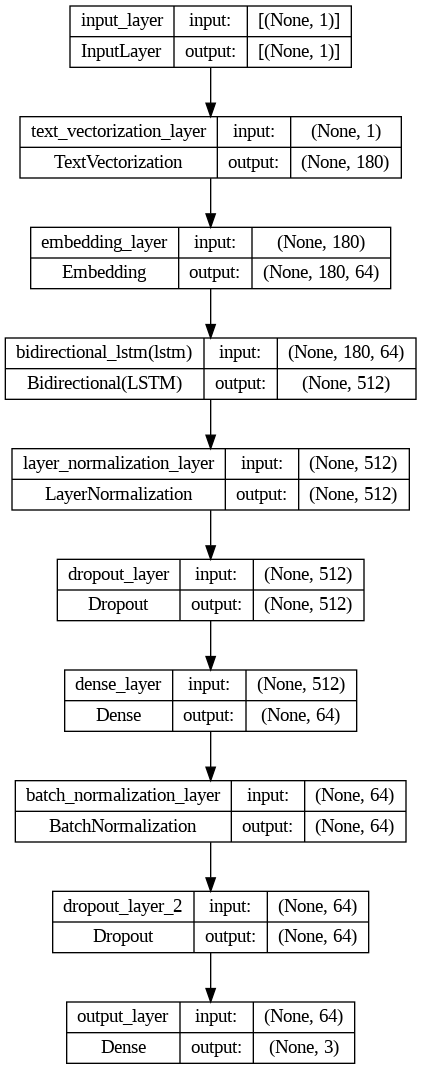

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file=f'{TF_RECURRENT_MODEL_DIR}model.png', show_shapes = True)

In [ ]:
# compile the model

# number of batches to be processed in one epoch 
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()

# total number of steps the model will be trained for
NUM_TRAIN_STEPS = BATCH_SIZE * steps_per_epoch * EPOCHS

lr_schedule = ExponentialDecay(
    INTIAL_LEARNING_RATE, decay_steps=NUM_TRAIN_STEPS, decay_rate=0.96, staircase=True
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)



trainable_variables = model.trainable_variables
optimizer.build(trainable_variables)

model.compile(optimizer = optimizer,
                loss = MULTICLASS_LOSS,
                metrics = METRICS #['accuracy']
                )

In [ ]:
import multiprocessing
gpu_name = tf.test.gpu_device_name()

num_workers = multiprocessing.cpu_count()
validation_steps = tf.data.experimental.cardinality(validation_dataset).numpy()
# Get the value of max_queue_size
max_queue_size = 10
print("Max Queue Size:", max_queue_size)
print(f"gpu_name: {gpu_name} Number of available CPUs: {num_workers} , steps_per_epoch : {steps_per_epoch} \n , validation_steps : {validation_steps} , Batch Size : {BATCH_SIZE}")

Max Queue Size: 10
gpu_name: /device:GPU:0 Number of available CPUs: 2 , steps_per_epoch : 200 
 , validation_steps : 25 , Batch Size : 256


In [ ]:
with tf.device(gpu_name):

  history = model.fit(
      train_dataset,           # Input training dataset
      validation_data = validation_dataset,    # Validation dataset
      epochs = EPOCHS,         # Number of training epochs
      callbacks = TF_CALLBACKS,  # List of callbacks for training
      verbose=1,                # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
      steps_per_epoch = steps_per_epoch,  # Number of steps per epoch for training dataset
      validation_steps = validation_steps,  # Number of steps per epoch for validation dataset
      validation_batch_size = BATCH_SIZE,  # Batch size for validation dataset
      shuffle = True,             # Shuffle the data each epoch
      use_multiprocessing = True, # Use multiple CPUs for processing the data
      workers = num_workers,      # Number of worker threads for preprocessing data
      max_queue_size = max_queue_size,    # Maximum size of the queue for storing preprocessed data
  )

Epoch 1/25
200/200 [==============================] - 431s 2s/step - loss: 1.7974 - accuracy: 0.7143 - val_loss: 1.9106 - val_accuracy: 0.7084
Epoch 2/25
200/200 [==============================] - 389s 2s/step - loss: 1.4362 - accuracy: 0.8396 - val_loss: 1.8311 - val_accuracy: 0.7202
Epoch 3/25
200/200 [==============================] - 379s 2s/step - loss: 1.2994 - accuracy: 0.8614 - val_loss: 1.7604 - val_accuracy: 0.7197
Epoch 4/25
200/200 [==============================] - 375s 2s/step - loss: 1.1802 - accuracy: 0.8732 - val_loss: 1.6880 - val_accuracy: 0.7193
Epoch 5/25
200/200 [==============================] - 377s 2s/step - loss: 1.0823 - accuracy: 0.8797 - val_loss: 1.6276 - val_accuracy: 0.7175
Epoch 6/25
200/200 [==============================] - 371s 2s/step - loss: 0.9855 - accuracy: 0.8888 - val_loss: 1.5793 - val_accuracy: 0.7139
Epoch 7/25
200/200 [==============================] - 374s 2s/step - loss: 0.9059 - accuracy: 0.8896 - val_loss: 1.5191 - val_accuracy: 0.7183

In [ ]:
# Save the model
tf.saved_model.save(model, TF_RECURRENT_MODEL_DIR)

# Load the saved model
loaded_model = tf.saved_model.load(TF_RECURRENT_MODEL_DIR)

In [ ]:
# Saving the Embedding Weights for other models to continue on instead of Random Weights
embedding_weights = model.get_layer('embedding_layer').get_weights()[0]
np.save(TF_RECURRENT_MODEL_DIR+'embedding_weights.npy', embedding_weights)

In [ ]:
!tensorboard --logdir logs/fit

##### Evaluating the Model

In [ ]:
%%time
loss, accuracy = model.evaluate(validation_dataset, verbose=2)

In [ ]:
import tensorflow as tf 
predictions=tf.math.softmax(outputs.logits,axis=-1)
print(predictions)

# MLP

> MLPClassifier stands for Multi-Layer Perceptron Classifier. It is a type of supervised learning algorithm that falls under the category of Artificial Neural Networks (ANNs). An MLPClassifier is a feedforward neural network, meaning that the input is processed in one direction through several layers of nodes until it reaches the output layer.

> In an MLPClassifier, the input data is fed into the input layer, and each node in the input layer is connected to every node in the next hidden layer. The hidden layer(s) then apply a non-linear transformation to the input data and pass the result to the next layer. The output layer then applies another non-linear transformation to the data, and the result is the predicted output.

> The key advantage of MLPClassifiers is their ability to learn non-linear decision boundaries, making them well-suited for solving complex classification problems. They are commonly used in natural language processing, image classification, and speech recognition tasks.

In [ ]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'id

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from tqdm import trange


# Load the dataset
train_dataset = pd.read_csv(stemmed_data_files['train']) 
X_train, y_train= train_dataset['TWEET'].map(lambda x : (buckwalter.transliterate(x)).lower()).values ,train_dataset['LABEL'].values

test_dataset = pd.read_csv(stemmed_data_files['validation'])  
X_test, y_test= test_dataset['TWEET'].map(lambda x : (buckwalter.transliterate(x)).lower()).values ,test_dataset['LABEL'].values

classes = np.unique(y_train)
print('data is loaded')


tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



print('training started ...')
# Initialize the MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(256, 128, 64), # array-like of shape(n_layers - 2,), default=(100,) The ith element represents the number of neurons in the ith  hidden layer.
                               max_iter=500, 
                               activation='tanh',
                               learning_rate ='adaptive',
                               batch_size=BATCH_SIZE,
                               verbose=True,
                               alpha= 0.0001,
                               learning_rate_init = INTIAL_LEARNING_RATE,                               
                               )

# Fit the MLPClassifier with a progress bar
for epoch in trange(EPOCHS, desc='Training Progress'):
    mlp_classifier.partial_fit(X_train_tfidf, y_train, classes=classes)

data is loaded
training started ...


Training Progress:   4%|▍         | 1/25 [01:42<41:10, 102.94s/it]

Iteration 1, loss = 1.02776927


Training Progress:   8%|▊         | 2/25 [03:25<39:17, 102.49s/it]

Iteration 2, loss = 0.76224734


Training Progress:  12%|█▏        | 3/25 [05:08<37:45, 102.97s/it]

Iteration 3, loss = 0.59463366


Training Progress:  16%|█▌        | 4/25 [06:52<36:06, 103.15s/it]

Iteration 4, loss = 0.50342136


Training Progress:  20%|██        | 5/25 [08:34<34:15, 102.76s/it]

Iteration 5, loss = 0.43868539


Training Progress:  24%|██▍       | 6/25 [10:15<32:21, 102.17s/it]

Iteration 6, loss = 0.38817795


Training Progress:  28%|██▊       | 7/25 [11:56<30:32, 101.81s/it]

Iteration 7, loss = 0.34830414


Training Progress:  32%|███▏      | 8/25 [13:39<28:57, 102.23s/it]

Iteration 8, loss = 0.31698761


Training Progress:  36%|███▌      | 9/25 [15:21<27:15, 102.24s/it]

Iteration 9, loss = 0.29186795


Training Progress:  40%|████      | 10/25 [17:02<25:26, 101.78s/it]

Iteration 10, loss = 0.27222876


Training Progress:  44%|████▍     | 11/25 [18:42<23:39, 101.37s/it]

Iteration 11, loss = 0.25586963


Training Progress:  48%|████▊     | 12/25 [20:22<21:52, 100.99s/it]

Iteration 12, loss = 0.24252525


Training Progress:  52%|█████▏    | 13/25 [22:03<20:09, 100.78s/it]

Iteration 13, loss = 0.23152809


Training Progress:  56%|█████▌    | 14/25 [23:42<18:24, 100.40s/it]

Iteration 14, loss = 0.22237972


Training Progress:  60%|██████    | 15/25 [25:22<16:41, 100.14s/it]

Iteration 15, loss = 0.21445230


Training Progress:  64%|██████▍   | 16/25 [27:03<15:02, 100.31s/it]

Iteration 16, loss = 0.20774192


Training Progress:  68%|██████▊   | 17/25 [28:43<13:22, 100.31s/it]

Iteration 17, loss = 0.20227503


Training Progress:  72%|███████▏  | 18/25 [30:22<11:40, 100.10s/it]

Iteration 18, loss = 0.19675819


Training Progress:  76%|███████▌  | 19/25 [32:02<09:59, 100.00s/it]

Iteration 19, loss = 0.19250965


Training Progress:  80%|████████  | 20/25 [33:43<08:21, 100.26s/it]

Iteration 20, loss = 0.18849762


Training Progress:  84%|████████▍ | 21/25 [35:23<06:40, 100.21s/it]

Iteration 21, loss = 0.18538723


Training Progress:  88%|████████▊ | 22/25 [37:03<05:00, 100.11s/it]

Iteration 22, loss = 0.18191547


Training Progress:  92%|█████████▏| 23/25 [38:42<03:19, 99.74s/it] 

Iteration 23, loss = 0.17929074


Training Progress:  96%|█████████▌| 24/25 [40:21<01:39, 99.66s/it]

Iteration 24, loss = 0.17679128


Training Progress: 100%|██████████| 25/25 [42:01<00:00, 100.87s/it]

Iteration 25, loss = 0.17417258


In [ ]:
# Use the trained model to make predictions on the test data
y_pred = mlp_classifier.predict(X_test_tfidf)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Accuracy: 0.6745920745920746
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70      2152
           1       0.65      0.65      0.65      2135
           2       0.68      0.66      0.67      2148

    accuracy                           0.67      6435
   macro avg       0.67      0.67      0.67      6435
weighted avg       0.67      0.67      0.67      6435

